<a href="https://colab.research.google.com/github/tejaskumarkoneti/AI-21-Sprint/blob/main/Cracking_the_Code_An_Inside_Look_at_Netflix's_Content_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> 1) How has the distribution of content ratings changed over time?




Looking at how ratings have shifted, the latest year in the dataset (2021) shows that Netflix leaned heavily toward mature content. The most common ratings that year were TV-MA (26 titles), R (25), and TV-14 (21), followed by PG-13 (19). Family-friendly content like PG (9) and TV-Y (5) was far less frequent. A year-by-year breakdown also shows how the share of each rating has changed over the past decade.

In [ ]:
import pandas as pd

# Load the dataset (replace with your file path)
df = pd.read_csv("netflix_titles.csv")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year
df['year_added'] = df['date_added'].dt.year

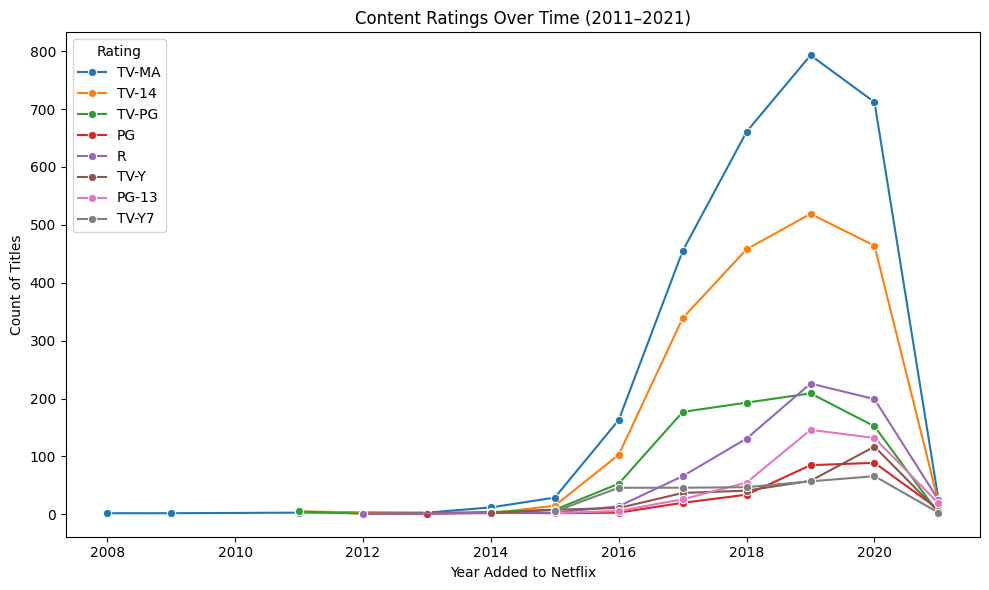

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Count ratings per year
rating_counts = (
    df.groupby(['year_added', 'rating'])
    .size()
    .reset_index(name='count')
)

# Focus on top 8 ratings overall
top_ratings = df['rating'].value_counts().nlargest(8).index
rating_counts = rating_counts[rating_counts['rating'].isin(top_ratings)]

plt.figure(figsize=(10,6))
sns.lineplot(data=rating_counts, x='year_added', y='count', hue='rating', marker="o")
plt.title("Content Ratings Over Time (2011–2021)")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count of Titles")
plt.legend(title="Rating")
plt.tight_layout()
plt.show()


2)Is there a relationship between content age and its type (Movie vs. TV Show)?
|

When comparing when content was released versus when it was added to Netflix, TV shows tend to appear on the platform much quicker than movies. On average, TV shows are added the same year they’re released (median lag = 0 years), while movies typically take about a year (median lag = 1 year).

---



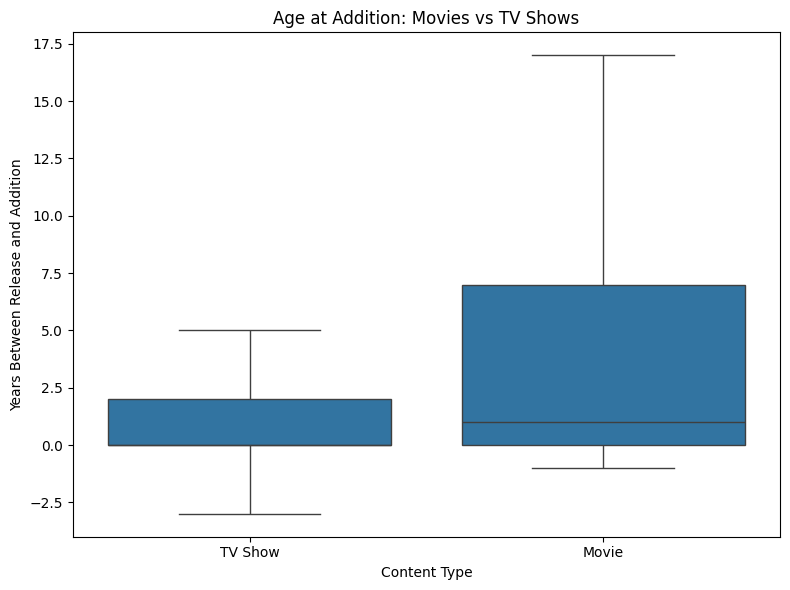

In [ ]:
# Compute age at addition
df['age_at_added'] = df['year_added'] - df['release_year']

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='type', y='age_at_added', showfliers=False)
plt.title("Age at Addition: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Years Between Release and Addition")
plt.tight_layout()
plt.show()


3) Can we identify any trends in content production based on the release year vs. the year added to Netflix?


Most titles show up on Netflix within a few years of their release, but there’s a long tail of older titles being added much later. A scatter plot confirms this, with many points falling along the “same year” line but others drifting upward, meaning they were added years after release. Looking at the last 30 years of data, the median lag suggests Netflix has been adding more recent releases faster in recent years.

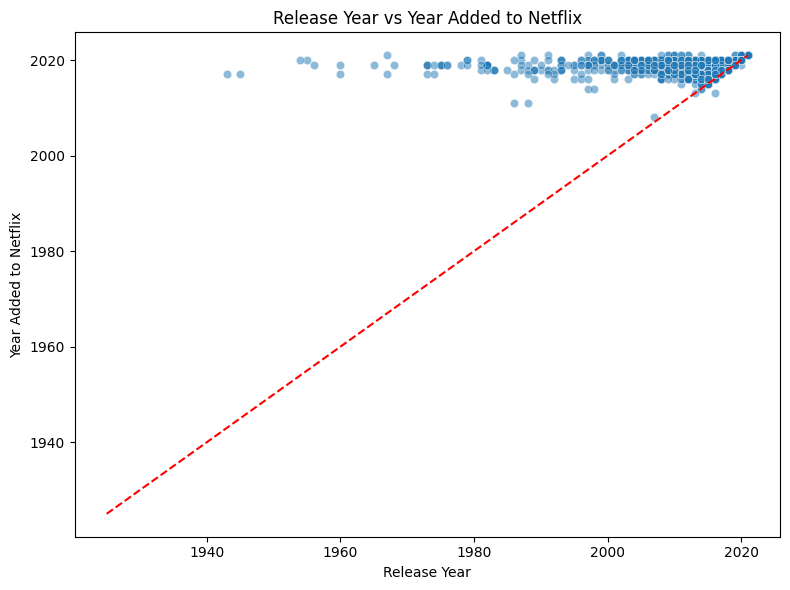

In [ ]:
plt.figure(figsize=(8,6))

# Sample to avoid overplotting (optional)
sample_df = df.sample(n=2000, random_state=42) if len(df) > 2000 else df

sns.scatterplot(data=sample_df, x='release_year', y='year_added', alpha=0.5)

# Add identity line (release year = year added)
min_year = df[['release_year','year_added']].min().min()
max_year = df[['release_year','year_added']].max().max()
plt.plot([min_year, max_year], [min_year, max_year], color='red', linestyle='--')

plt.title("Release Year vs Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.tight_layout()
plt.show()

4)  What are the most common word pairs or phrases in content descriptions?


Netflix descriptions reveal some recurring themes. Popular two-word phrases include “high school,” “year old,” “new york,” “small town,” “best friend,” “true story,” “stand special,” and “world war.” These reflect common settings, character types, and story tropes across Netflix’s catalog.

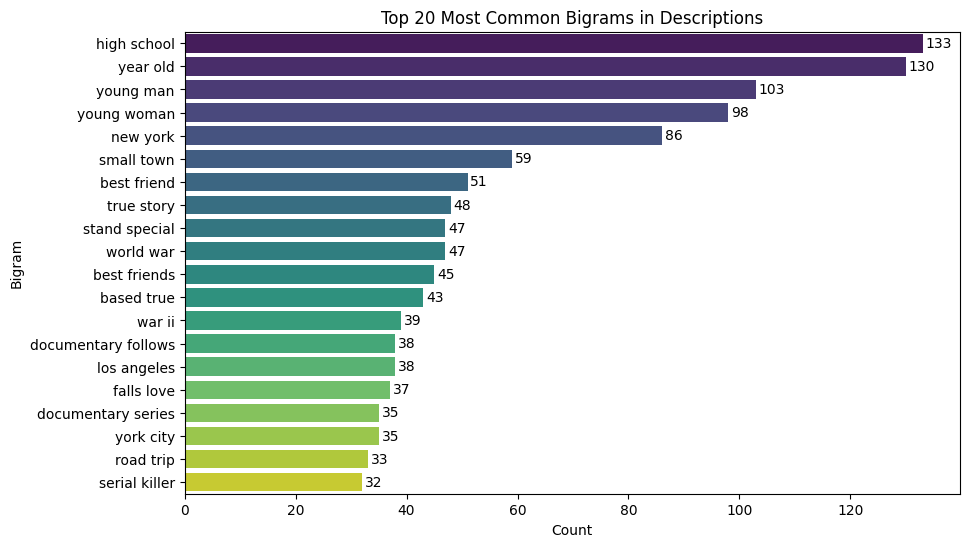

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bigram extraction
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=5)
X = vectorizer.fit_transform(df['description'].dropna())
bigrams = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))

# Top 20 bigrams
top_bigrams = pd.DataFrame(bigrams.most_common(20), columns=['bigram','count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_bigrams,
    x='count',
    y='bigram',
    hue='bigram',
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Top 20 Most Common Bigrams in Descriptions")
plt.xlabel("Count")
plt.ylabel("Bigram")

# Add count labels on bars
for i, count in enumerate(top_bigrams['count']):
    plt.text(count + 0.5, i, str(count), va='center')

plt.show()


5)  Who are the top directors on Netflix?

Certain directors have a strong presence on Netflix. The most prolific are Jan Suter (21 titles) and Raúl Campos (19), followed by comedy and film veterans like Marcus Raboy (16), Jay Karas (15), and Cathy Garcia-Molina (13). Big names like Martin Scorsese and Steven Spielberg also make the top list, though with fewer titles.

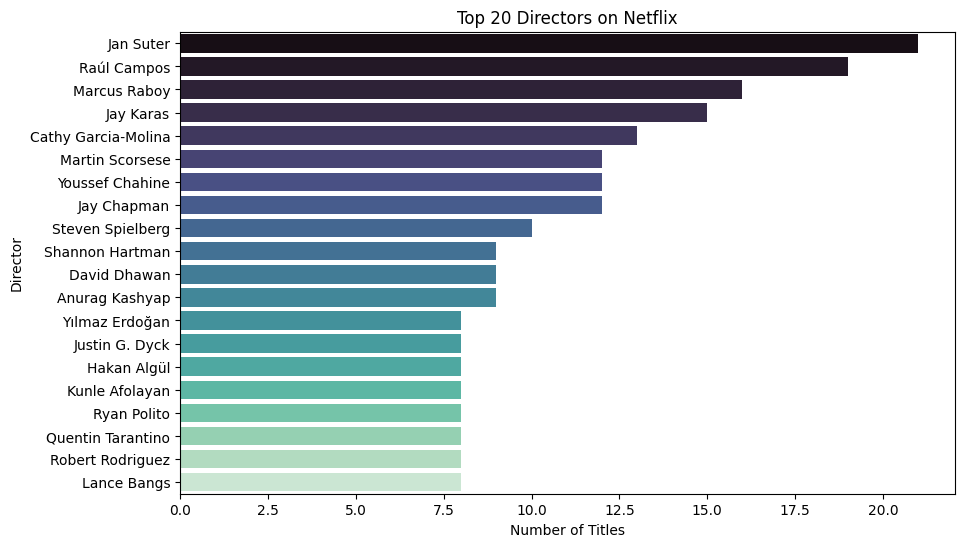

In [ ]:
# Split multiple directors and count
directors = df['director'].dropna().str.split(',').explode().str.strip()
top_directors = directors.value_counts().nlargest(20).reset_index()
top_directors.columns = ['director','count']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_directors,
    x='count',
    y='director',
    hue='director',
    palette="mako",
    dodge=False,
    legend=False
)
plt.title("Top 20 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()
